Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


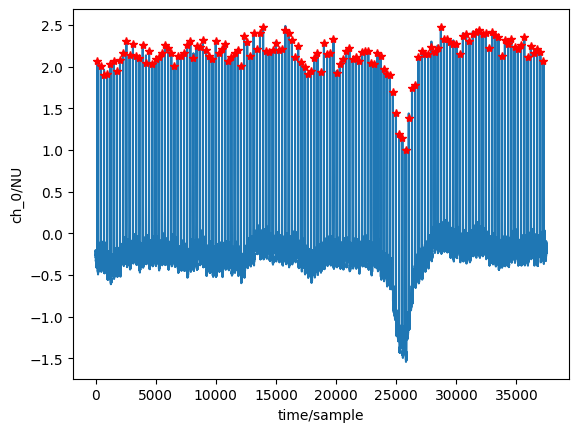

In [3]:
import wfdb
import math
from wfdb import processing  # for xqrs detection


rmeans = {'filename': 'rmean'}
rstandard_deviation = {'filename': 'rstd'}
rinvalid = []


def mean_std(file_path, file_name, start, stop):

    file_destination = file_path+file_name
    sig, fields = wfdb.rdsamp(file_destination, channels=[
                              0], sampfrom=start, sampto=stop)
    xqrs = processing.XQRS(sig=sig[:, 0], fs=fields['fs'])
    xqrs.detect()

    # print(fields)
    wfdb.plot_items(signal=sig, ann_samp=[xqrs.qrs_inds]  )

    # sqrs.qrs_inds is array containing indexes of qrs ?

    rpeaksum = 0
    for i in xqrs.qrs_inds:
        rpeaksum += sig[i]
    try:
        rmean = (rpeaksum/len(xqrs.qrs_inds))
        rmeans[file_name] = float(rmean)

        rstdsum = 0
        for i in xqrs.qrs_inds:
            rstdsum += (sig[i]-rmean)**2
        rstd = math.sqrt(rstdsum/len(xqrs.qrs_inds))
        # print("standard deviation is",rstd)
        rstandard_deviation[file_name] = float(rstd)

    except ZeroDivisionError:
        rinvalid.append(file_name)


def main():
    file_path = r"D:\vf predict\cu-ventricular-tachyarrhythmia-database-1.0.0"
    file_name = "\cu01"
    file_destination = file_path+file_name
    stop = 53542-7500
    start = stop - 37500  # 7500 samples = 30 seconds
    mean_std(file_path, file_name, start, stop)
    # print(rmeans)
    # print(rinvalid)
    # print(rstandard_deviation)


main()


Area??


Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


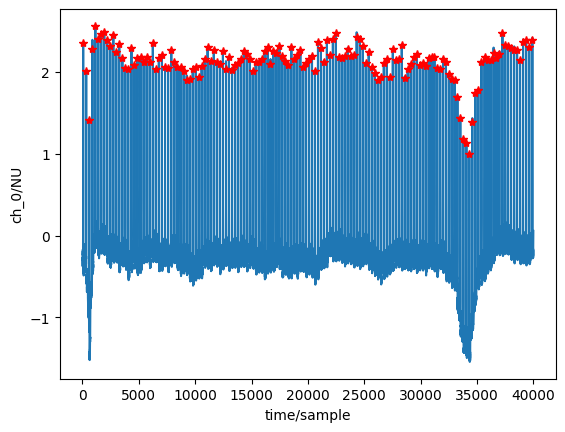

In [25]:
file_path = r"D:\vf predict\cu-ventricular-tachyarrhythmia-database-1.0.0"
file_name = "\cu01"
file_destination = file_path+file_name
sig, fields = wfdb.rdsamp(file_destination, channels=[0], sampto=40000)
xqrs = processing.XQRS(sig=sig[:, 0], fs=fields['fs'])
xqrs.detect()
wfdb.plot_items(signal=sig, ann_samp=[xqrs.qrs_inds])


['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', '+']


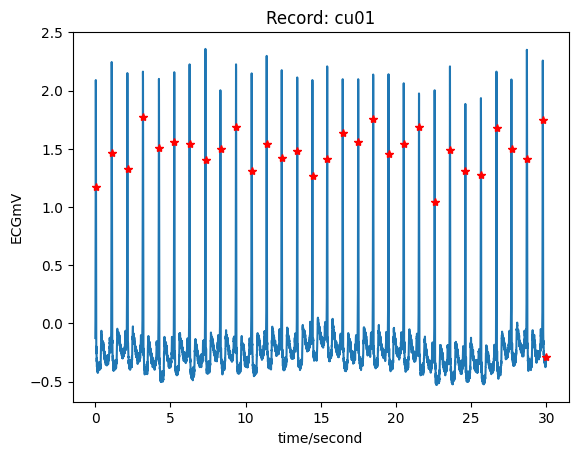

In [66]:
import wfdb
file_path = r"D:\vf predict\cu-ventricular-tachyarrhythmia-database-1.0.0"
file_name = "\cu01"
file_destination = file_path+file_name
stop = 53542
start = stop - 7500  # 7500 samples = 30 seconds
record = wfdb.rdrecord(file_destination, sampfrom=start, sampto=stop)
annotation = wfdb.rdann(file_destination, 'atr',
                        sampfrom=start, sampto=stop, shift_samps=True)
wfdb.plot_wfdb(record=record,
               annotation=annotation,
               time_units='seconds')
